In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models, Input
from tensorflow.keras.models import Sequential

## Prepare the Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
test_images.shape

(10000, 28, 28)

In [4]:
train_images = train_images.reshape((60000, 28,28, 1))
test_iamges = test_images.reshape((10000, 28,28, 1))



In [5]:
train_images, test_images = train_images / 255.0, test_iamges / 255.0

In [6]:
train_images.shape

(60000, 28, 28, 1)

## Create Model

In [7]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    Input(shape=(img_height, img_width, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Compile the Model

In [8]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(x=train_images, y=train_labels,epochs=30, batch_size=32, validation_split=0.2, verbose='1')

Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


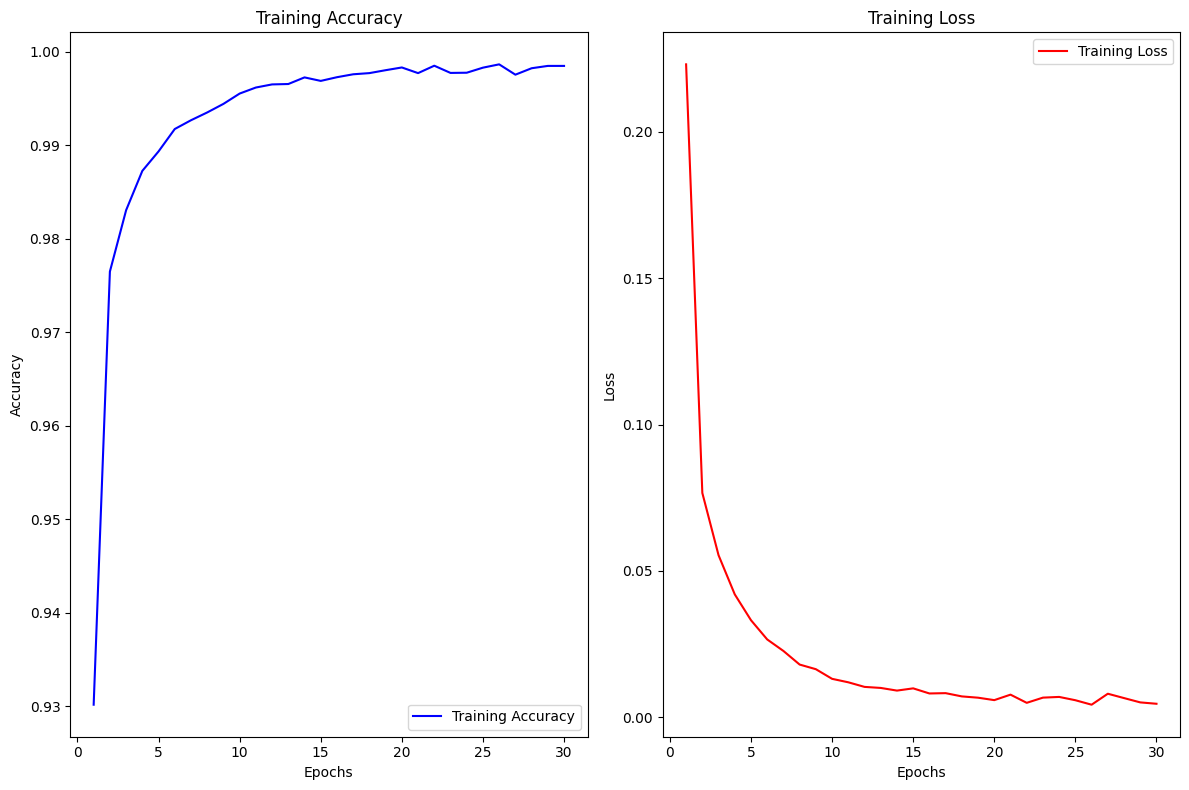

In [15]:
# Get accuracy and loss from history object
acc = history.history['accuracy']  # Training accuracy
loss = history.history['loss']  # Training loss

# Create the epoch range based on the length of the training data
epochs_range = range(1, len(acc) + 1)

# Plot the accuracy and loss curves
plt.figure(figsize=(12, 8))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='red')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()


## Testing the images

In [17]:
image = (train_images[1]).reshape(1,28,28,1)
model_pred = np.argmax(model.predict(image), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


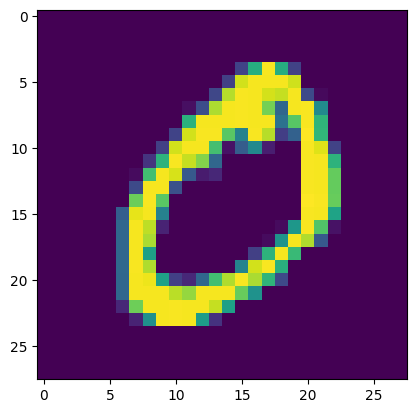

Prediction of model is [0]


In [18]:
plt.imshow(image.reshape(28,28))
plt.show()

print('Prediction of model is {}'.format(model_pred))

Test images array shape: (6, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted digit: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted digit: 4


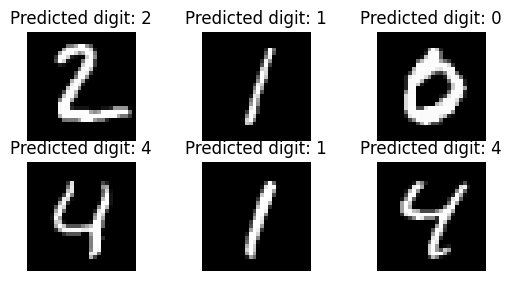

In [22]:
images = test_images[1:7]  # 4 test images
images = images.reshape(images.shape[0], 28, 28)  # Reshaping to (4, 28, 28)

print("Test images array shape: {}".format(images.shape))

# Loop through the images and predict
for i, test_image in enumerate(images, start=1):

    org_image = test_image  # Original image
    test_image = test_image.reshape(1, 28, 28, 1)  # Reshaping for the model input

    # Predict class (fix for deprecated `predict_classes`)
    prediction = np.argmax(model.predict(test_image), axis=-1)  # Using `predict` + `argmax`

    print("Predicted digit: {}".format(prediction[0]))

    # Plotting the image and prediction
    plt.subplot(3, 3, i)  # Creating a 2x2 grid for 4 images
    plt.axis('off')  # Hide axis
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

In [23]:
model.save('ocr_model.h5')